<a href="https://colab.research.google.com/github/SelamZem/Pytorch_exercise/blob/main/PyTorch_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

n_samples = 1000

#Create circles
X, y = make_circles(n_samples=n_samples,
                  noise=0.03,
                  random_state=42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"X ",X[:5])
print(f"y ",y[:5])

X  [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
y  [1 1 1 1 0]


In [5]:
import pandas as pd

circles = pd.DataFrame({
    "X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})

In [6]:
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


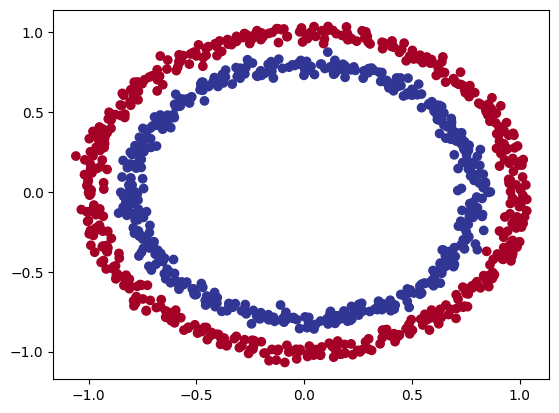

In [7]:
#visualize
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
           y=X[:, 1],
           c=y,
           cmap=plt.cm.RdYlBu)

# Check input and output shapes

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
X_sample = X[0]
y_sample = y[0]

X_sample, y_sample

(array([0.75424625, 0.23148074]), 1)

#Turn data into tensors and create train and test splits

In [10]:
import torch

In [11]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [12]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [13]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   random_state=42)

In [14]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

# Build Model

In [15]:
import torch
from torch import nn

#Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [16]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [17]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
      super().__init__()
      # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
      self.layer_1=nn.Linear(in_features=2, out_features=5)
      self.layer_2=nn.Linear(in_features=5, out_features=1) # the infeatures of layer2 should match  the out_feature of layer_1

# 3. define a forward() method that outllines the forward pass
  def forward(self, x):
            return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

#4 Instantiate an instance of our model class and send it tto the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
next(model_0.parameters()).device

device(type='cpu')

In [19]:
# # using sequential methode(Easier but alike with the above one)
# model_0 = nn.Sequential(
#     nn.Linear(in_features=2, out_features=5),
#     nn.Linear(in_features=5, out_features=1)
# ).to(device)

# model_0

In [20]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.0446,  0.4915],
                      [-0.5120,  0.1370],
                      [-0.6170,  0.6499],
                      [-0.1393, -0.5983],
                      [-0.0044,  0.0421]])),
             ('layer_1.bias',
              tensor([ 0.3666, -0.6909, -0.4880, -0.1199, -0.2619])),
             ('layer_2.weight',
              tensor([[-0.0282,  0.1950,  0.2334,  0.1528, -0.0212]])),
             ('layer_2.bias', tensor([0.2537]))])

In [21]:
# Make prediction
untrained_preds = model_0(X_test.to(device))
print(torch.round(untrained_preds[:10]))
print(y_test[:10])

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [0.],
        [0.]], grad_fn=<RoundBackward0>)
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


# Setup loss function

In [22]:
# Loss function
# loss_fun =nn.BCELoss #requires inputsto have gone through the sigmoid activation fun
loss_fn = nn.BCEWithLogitsLoss() #sigmoid activation function

# Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


In [23]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.0446,  0.4915],
                      [-0.5120,  0.1370],
                      [-0.6170,  0.6499],
                      [-0.1393, -0.5983],
                      [-0.0044,  0.0421]])),
             ('layer_1.bias',
              tensor([ 0.3666, -0.6909, -0.4880, -0.1199, -0.2619])),
             ('layer_2.weight',
              tensor([[-0.0282,  0.1950,  0.2334,  0.1528, -0.0212]])),
             ('layer_2.bias', tensor([0.2537]))])

In [24]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

# Train Model

In [25]:
# Going from raw Logists => Prediction probabilities => prediction labels

# View the first 5 outputs of the fwd pass on test data
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[ 0.1312],
        [ 0.0472],
        [ 0.1464],
        [ 0.1277],
        [-0.1790]])

In [26]:
# use the sigmoid activation function on our logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5327],
        [0.5118],
        [0.5365],
        [0.5319],
        [0.4554]])

In [27]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))


tensor([True, True, True, True, True])


In [28]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

# Building a training and testing loop

In [29]:
torch.cuda.manual_seed(42)

epochs= 100

X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

# training and evaluatin loop
for epoch in range(epochs):
  # Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate the accuracy/loss
  # loss = loss_fn(torch.sigmoid(y_logits), # nn.BCELoss expects prediction probabilities as input
  #                y_train)
  loss = loss_fn(y_logits, # nn.BCEWithLogitLoss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  #5. Optimizer step(gradient step)
  optimizer.step()

  # Testing
  model_0.eval()
  with torch.inference_mode():
    #1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2. Calculate loss/accuracy
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc}%")

Epoch: 0 | Loss: 0.69737, Acc: 49.75% | Test Loss: 0.69547, Test Acc: 49.5%
Epoch: 10 | Loss: 0.69662, Acc: 50.62% | Test Loss: 0.69481, Test Acc: 48.0%
Epoch: 20 | Loss: 0.69618, Acc: 50.50% | Test Loss: 0.69441, Test Acc: 49.5%
Epoch: 30 | Loss: 0.69586, Acc: 50.75% | Test Loss: 0.69411, Test Acc: 49.0%
Epoch: 40 | Loss: 0.69561, Acc: 50.50% | Test Loss: 0.69387, Test Acc: 49.5%
Epoch: 50 | Loss: 0.69540, Acc: 50.00% | Test Loss: 0.69368, Test Acc: 50.0%
Epoch: 60 | Loss: 0.69522, Acc: 50.50% | Test Loss: 0.69352, Test Acc: 50.0%
Epoch: 70 | Loss: 0.69506, Acc: 50.50% | Test Loss: 0.69338, Test Acc: 50.0%
Epoch: 80 | Loss: 0.69491, Acc: 51.12% | Test Loss: 0.69327, Test Acc: 50.0%
Epoch: 90 | Loss: 0.69479, Acc: 51.12% | Test Loss: 0.69318, Test Acc: 50.0%


# Visualize

In [30]:

# From the metrics it looks our model isnt learning anything
import requests
from pathlib import Path

if Path("helper_fucntions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

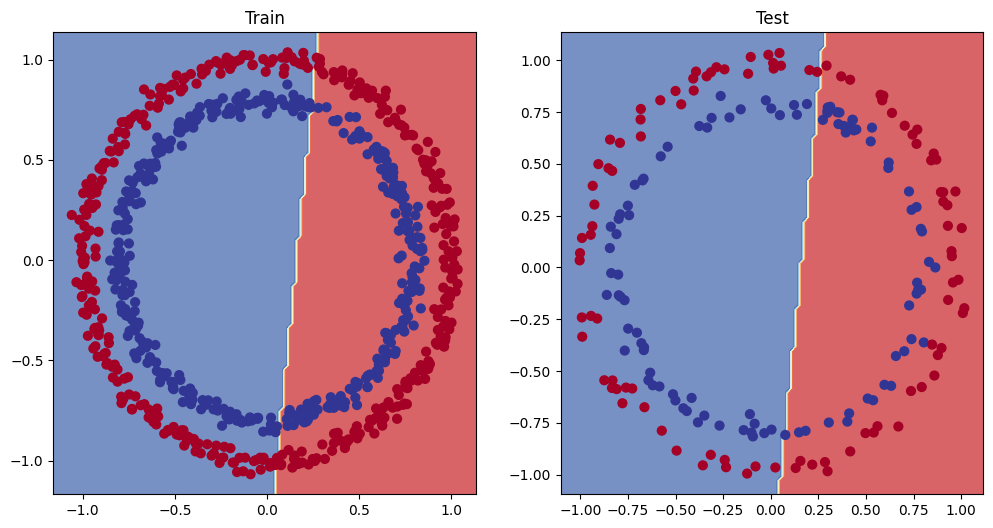

In [31]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

# Improving a model(from model perspective)

* Add more layers - give the model more chances to lean about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Changing the activation function
* Changing the learning rate
* Change the loss function

In [32]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    # z= self.layer_1(x)
    # z2 = torch.relu(z)
    # z3 = self.layer_2(z2)
    # return z3
    #to speed up we just return it in same line
    return self.layer_3((self.layer_2((self.layer_1(x)))))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [33]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.1295,  0.3256],
                      [-0.5617, -0.2217],
                      [-0.5172, -0.6868],
                      [ 0.6547, -0.5992],
                      [ 0.2970, -0.3266],
                      [-0.5074,  0.6015],
                      [ 0.3777,  0.3689],
                      [-0.4169, -0.2376],
                      [ 0.2026,  0.4870],
                      [-0.1848,  0.6370]])),
             ('layer_1.bias',
              tensor([-0.5527,  0.2519,  0.6885,  0.3646, -0.6878,  0.2058,  0.4827, -0.3886,
                      -0.2707,  0.4189])),
             ('layer_2.weight',
              tensor([[-0.0677, -0.0175,  0.1426, -0.0984,  0.0108,  0.0304,  0.0438,  0.1648,
                       -0.1851,  0.0064],
                      [ 0.2387, -0.0600, -0.1486,  0.0937, -0.0852,  0.2320,  0.2532,  0.0093,
                        0.2910, -0.0184],
                      [-0.1389,  0.0213,  0.3130, -0.1950, -0.2324, -0.2

In [34]:
# Create a lossfunction
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [35]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# Put data to target device
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_train, y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc}%")

Epoch: 0 | Loss: 0.69440, Acc: 51.38% | Test Loss: 0.69152, Test Acc: 54.0%
Epoch: 100 | Loss: 0.69303, Acc: 50.62% | Test Loss: 0.69386, Test Acc: 46.5%
Epoch: 200 | Loss: 0.69298, Acc: 51.12% | Test Loss: 0.69448, Test Acc: 46.0%
Epoch: 300 | Loss: 0.69298, Acc: 51.38% | Test Loss: 0.69463, Test Acc: 45.5%
Epoch: 400 | Loss: 0.69298, Acc: 51.38% | Test Loss: 0.69467, Test Acc: 45.0%
Epoch: 500 | Loss: 0.69298, Acc: 51.12% | Test Loss: 0.69468, Test Acc: 45.5%
Epoch: 600 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.0%
Epoch: 700 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.0%
Epoch: 800 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.0%
Epoch: 900 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.0%


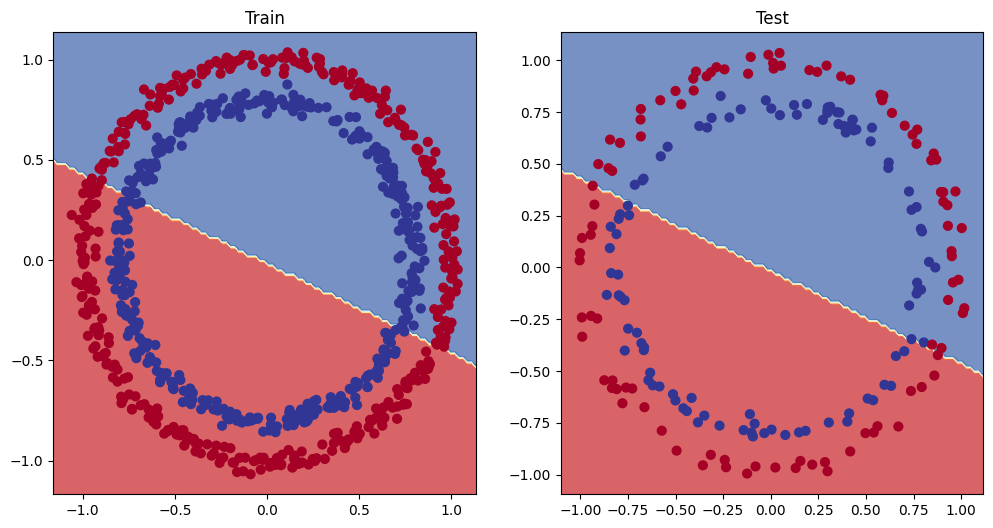

In [36]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

In [37]:
# Preparing data to see if the model can fit straight line

weight = 0.7
bias = 0.3
start =0
end =1
step = 0.01
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

#check the data
X_regression[:10], y_regression[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

In [38]:
# train_split
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(80, 80, 20, 20)

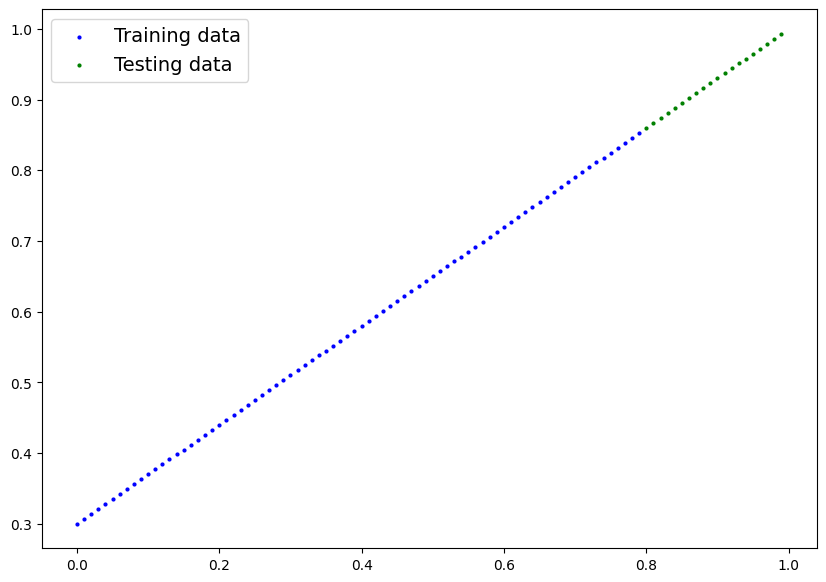

In [39]:
plot_predictions(X_train_regression,y_train_regression, X_test_regression, y_test_regression)

In [40]:
# Adjust model_1 to fit a straight line

model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [41]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [42]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# Put data to target device
X_train_regression, X_test_regression = X_train_regression.to(device), X_test_regression.to(device)
y_train_regression, y_test_regression = y_train_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):

  y_pred = model_2(X_train_regression)

  loss = loss_fn(y_pred,y_train_regression)
  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986 | Test Loss: 0.54143
Epoch: 100 | Loss: 0.09309 | Test Loss: 0.02901
Epoch: 200 | Loss: 0.07376 | Test Loss: 0.02850
Epoch: 300 | Loss: 0.06745 | Test Loss: 0.00615
Epoch: 400 | Loss: 0.06107 | Test Loss: 0.02004
Epoch: 500 | Loss: 0.05698 | Test Loss: 0.01061
Epoch: 600 | Loss: 0.04857 | Test Loss: 0.01326
Epoch: 700 | Loss: 0.06109 | Test Loss: 0.02127
Epoch: 800 | Loss: 0.05600 | Test Loss: 0.01425
Epoch: 900 | Loss: 0.05571 | Test Loss: 0.00603


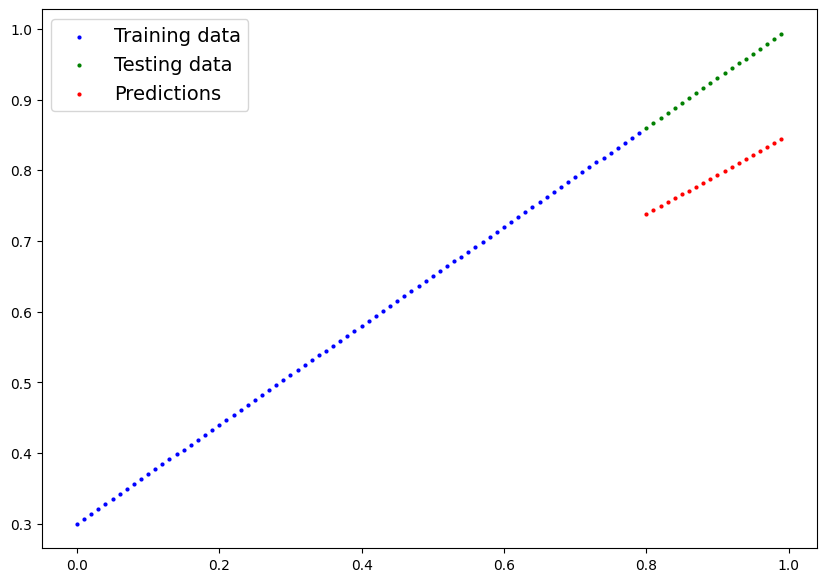

In [43]:
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

plot_predictions(X_train_regression, y_train_regression, X_test_regression, y_test_regression,
                 y_preds)

In [44]:
device

'cpu'

# Recreating non-linear data set

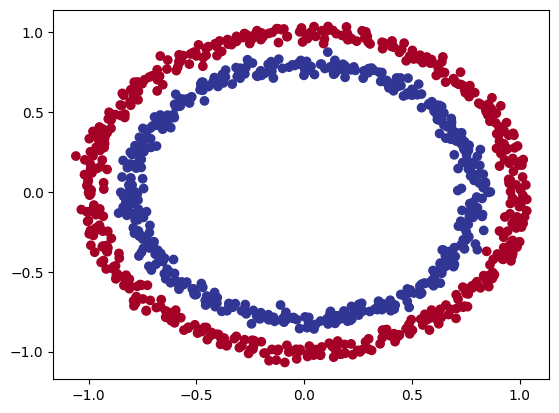

In [45]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

#Create circles
X, y = make_circles(n_samples=n_samples,
                  noise=0.03,
                  random_state=42)

plt.scatter(x=X[:, 0],
           y=X[:, 1],
           c=y,
           cmap=plt.cm.RdYlBu)

In [46]:
# Convert data to tensors
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

#split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   random_state=42)
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

# Building model

In [47]:
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [48]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

In [49]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)


epoch = 1000

X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)


for epoch in range(epochs):
  model_3.train()
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_train, y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc}%")

Epoch: 0 | Loss: 0.69295, Acc: 50.00% | Test Loss: 0.69319, Test Acc: 50.0%
Epoch: 100 | Loss: 0.69115, Acc: 52.88% | Test Loss: 0.69102, Test Acc: 52.5%
Epoch: 200 | Loss: 0.68977, Acc: 53.37% | Test Loss: 0.68940, Test Acc: 55.00000000000001%
Epoch: 300 | Loss: 0.68795, Acc: 53.00% | Test Loss: 0.68723, Test Acc: 56.00000000000001%
Epoch: 400 | Loss: 0.68517, Acc: 52.75% | Test Loss: 0.68411, Test Acc: 56.49999999999999%
Epoch: 500 | Loss: 0.68102, Acc: 52.75% | Test Loss: 0.67941, Test Acc: 56.49999999999999%
Epoch: 600 | Loss: 0.67515, Acc: 54.50% | Test Loss: 0.67285, Test Acc: 56.00000000000001%
Epoch: 700 | Loss: 0.66659, Acc: 58.38% | Test Loss: 0.66322, Test Acc: 59.0%
Epoch: 800 | Loss: 0.65160, Acc: 64.00% | Test Loss: 0.64757, Test Acc: 67.5%
Epoch: 900 | Loss: 0.62362, Acc: 74.00% | Test Loss: 0.62145, Test Acc: 79.0%


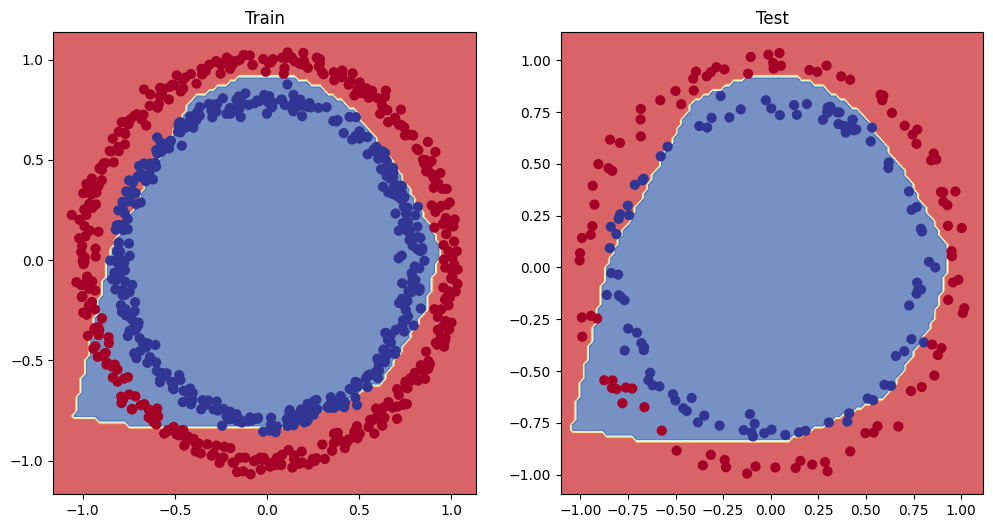

In [50]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)